In [6]:
# imamo grid... sestkotnik je 4 enote sirok in 2 enoti visok

A1 = vector([0, - 2])
A2 = vector([3, - 1])

class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, c, d):
        return U(self.a + c, self.b + d)
    
class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + vector([2, 0])
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, c, d):
        return V(self.a + c, self.b + d)


# grid vcash ne dela... problem hash
def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()
    # lahko bi dali vsa vozlisca kar v mnozico??
    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)

    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

# 3x3 matrika
def determinanta(matrika): 
    a11 = matrika[0][0]
    a12 = matrika[0][1]
    a13 = matrika[0][2]
    
    a21 = matrika[1][0]
    a22 = matrika[1][1]
    a23 = matrika[1][2]
    
    a31 = matrika[2][0]
    a32 = matrika[2][1]
    a33 = matrika[2][2]
        
    det = (
          a11 * (a22 * a33 - a32 * a23) - 
          a12 * (a21 * a33 - a31 * a23) + 
          a13 * (a21 * a32 - a31 * a22)
          )
            
    return det

# gledamo kje je tocka w glede na vektor uv
# ce je tocka levo, je predznak determinante pozitiven,
# ce desno, je predznak negativen,
# ce pa so kolinearne je determinanta 0.
# sprejme tocke U ali V
def zavoj(u, v , w):
    u_x, u_y = u.koordinate()
    v_x, v_y = v.koordinate()
    w_x, w_y = w.koordinate()
    
    matrika = matrix([[1, 1, 1], [u_x, v_x, w_x], [u_y, v_y, w_y]])
    
    return sgn(determinanta(matrika))

def v_paralelogramu(G, u0, u1, u2, u3):
    # G mnozica Ujev, ki jih bomo pregledali,
    # ui zaporedna oglisca v paralelogramu, tako da je notranjost na levi,
    # u0 pa je izhodisce 
    # dopuscamo tocke na daljici u0u1 in na daljici  u3u0
    
    Uji = set()
    Vji = set()
    
    for u in G:   
        v = V(u.a, u.b) # "pripadajoce" vozlisce V
#         print u, v
        
#         print(zavoj(u0, u1, u) >= 0,
#               zavoj(u1, u2, u) >  0,
#               zavoj(u2, u3, u) >  0,
#               zavoj(u3, u0, u) >= 0)
        
#         print(zavoj(u0, u1, v) >= 0,
#               zavoj(u1, u2, v) >  0,
#               zavoj(u2, u3, v) >  0,
#               zavoj(u3, u0, v) >= 0)
            
        pogoj_u = (zavoj(u0, u1, u) >= 0 and
                   zavoj(u1, u2, u) >  0 and
                   zavoj(u2, u3, u) >  0 and
                   zavoj(u3, u0, u) >= 0)
#         print(pogoj_u)
        
        pogoj_v = (zavoj(u0, u1, v) >= 0 and
                   zavoj(u1, u2, v) >  0 and
                   zavoj(u2, u3, v) >  0 and
                   zavoj(u3, u0, v) >= 0)
#         print(pogoj_v)
        
        if pogoj_u:
            Uji.add(u)
#             print("dodal sem ", u)
        if pogoj_v: # ce je elif ne doda, saj je ze prvi res
            Vji.add(v)
#             print("dodal sem v")
    
    return Uji, Vji
    
def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    
    u_00 = U(0,0)
    u_kl = U(k, l)
    u_klmn = U(k + m, l + n)
    u_mn = U(m, n)

    # ugotovimo orientacijo
    if zavoj(u_kl, u_mn, u_00) == 0:
        # izrojen paralelogram ... daljica... mogoce je se kaj 
        print("Paralelogram je izrojen.")
    elif zavoj(u_kl, u_mn, u_00) > 0:
        # u_00 lezi levo od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_kl, u_klmn, u_mn)
    elif zavoj(u_kl, u_mn, u_00) < 0:
        # u_00 lezi desno od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_mn, u_klmn, u_kl)
    
    return Uji, Vji

def povezave_na_torusu(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    vozlisca = union(Uij, Vij) # vozlisca znotraj paralelograma (brez stranic)
    pregledane = set()
    povezave = []
    for tocka in vozlisca:
        for sosed in (tocka.sosedi() - pregledane): # tocka.sosedi().difference(pregledane)
            sosed_kl = sosed.premakni(k, l)
            sosed_mn = sosed.premakni(m, n)
            if sosed in vozlisca:
                povezave.append((str(tocka), str(sosed)))
            else:
                if sosed_kl in vozlisca:
                    povezave.append((str(tocka), str(sosed_kl)))
                elif sosed_mn in vozlisca:
                    povezave.append((str(tocka), str(sosed_mn)))
                elif sosed == U(k + m, l + n):
                    povezave.append((str(tocka), str(U(0, 0)))) # to je sosed_klmn, nasprotno oglisce
        pregledane.add(tocka)
    return povezave 

def nanotorus(k, l, m, n):
    return Graph(povezave_na_torusu(k,l,m,n), multiedges = True)

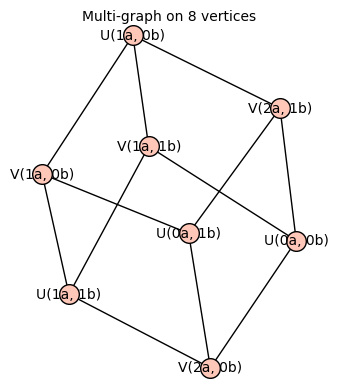

In [9]:
nanotorus(2,0,0,2)